## Урок 2. Keras. Домашнее задание

In [1]:
# чтобы не ругался на GPU
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
# скрываем warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [5]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [6]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [7]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [8]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Train the model.
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,)
print("Обучение завершено")

Epoch 1/5
1875/1875 [==============================] - 22s 10ms/step - loss: 0.3603 - accuracy: 0.8929
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1874 - accuracy: 0.9435
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1423 - accuracy: 0.9564
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1209 - accuracy: 0.9624
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1019 - accuracy: 0.9683
Обучение завершено


In [11]:
# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 3s 6ms/step - loss: 0.1204 - accuracy: 0.9641
Loss - 0.12, Accuracy - 0.96


### Задание_1:
Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами.

### Модель_2. 
#### Изменения в количестве и качестве слоёв, увеличение количества эпох и обучающих примеров

In [12]:
# Build the model_2.
model_2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [13]:
# Compile the model.
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Train the model.
history_2 = model_2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,)
print("Обучение завершено")

Epoch 1/10
938/938 [==============================] - 38s 36ms/step - loss: 0.2701 - accuracy: 0.9157
Epoch 2/10
938/938 [==============================] - 33s 35ms/step - loss: 0.1330 - accuracy: 0.9586
Epoch 3/10
938/938 [==============================] - 33s 35ms/step - loss: 0.1021 - accuracy: 0.9688
Epoch 4/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0834 - accuracy: 0.9733
Epoch 5/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0716 - accuracy: 0.9766
Epoch 6/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0646 - accuracy: 0.9793
Epoch 7/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0546 - accuracy: 0.9824
Epoch 8/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0501 - accuracy: 0.9837
Epoch 9/10
938/938 [==============================] - 33s 36ms/step - loss: 0.0452 - accuracy: 0.9850
Epoch 10/10
938/938 [==============================] - 33s 35ms/step - loss: 0.044

In [16]:
# Evaluate the model_2.
loss,metrics = model_2.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0813 - accuracy: 0.9759
Loss - 0.08, Accuracy - 0.98


### Модель_3. 
#### Вернём только параметры слоёв начальной модели.

In [17]:
# Build the model.
model_3 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [18]:
# Compile the model.
model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Train the model.
history_3 = model_3.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,)
print("Обучение завершено")

Epoch 1/10
938/938 [==============================] - 12s 10ms/step - loss: 0.4090 - accuracy: 0.8792
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2180 - accuracy: 0.9359
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.1657 - accuracy: 0.9504
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.1353 - accuracy: 0.9589
Epoch 5/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1147 - accuracy: 0.9649
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.1026 - accuracy: 0.9685
Epoch 7/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0910 - accuracy: 0.9716
Epoch 8/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0825 - accuracy: 0.9740
Epoch 9/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0782 - accuracy: 0.9755
Epoch 10/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0701 - a

In [21]:
# Evaluate the model_3.
loss,metrics = model_3.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 3s 7ms/step - loss: 0.1072 - accuracy: 0.9700
Loss - 0.11, Accuracy - 0.97


### Модель_4. 
#### Слои модели_2 при параметрах fit начальной модели

In [22]:
# Build the model_4.
model_4 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [23]:
# Compile the model.
model_4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [24]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Train the model.
history_4 = model_4.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,)
print("Обучение завершено")

Epoch 1/5
1875/1875 [==============================] - 60s 30ms/step - loss: 0.2699 - accuracy: 0.9163
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1406 - accuracy: 0.9569
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1125 - accuracy: 0.9657
Epoch 4/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0933 - accuracy: 0.9710
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0808 - accuracy: 0.9742
Обучение завершено


In [26]:
# Evaluate the model_3.
loss,metrics = model_4.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0920 - accuracy: 0.9724
Loss - 0.09, Accuracy - 0.97


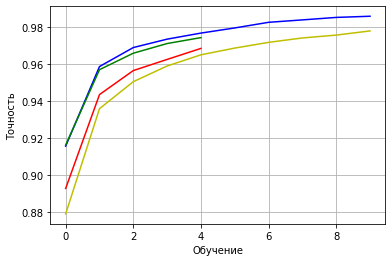

In [27]:
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history_2.history['accuracy'], color = 'b')
plt.plot(history_3.history['accuracy'], color = 'y')
plt.plot(history_4.history['accuracy'], color = 'g')
plt.xlabel('Обучение')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

### Модель_2 лучшая. Далее попробуем на ней разные оптимизаторы:

In [28]:
# Build the model_5.
model_5 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [29]:
# Compile the model.
model_5.compile(
  optimizer='sgd',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [30]:
# Train the model.
history_5 = model_5.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,)
print("Обучение завершено")

Epoch 1/10
938/938 [==============================] - 23s 22ms/step - loss: 0.6575 - accuracy: 0.8327
Epoch 2/10
938/938 [==============================] - 22s 24ms/step - loss: 0.3257 - accuracy: 0.9069
Epoch 3/10
938/938 [==============================] - 23s 24ms/step - loss: 0.2724 - accuracy: 0.9218
Epoch 4/10
938/938 [==============================] - 23s 24ms/step - loss: 0.2380 - accuracy: 0.9312
Epoch 5/10
938/938 [==============================] - 22s 24ms/step - loss: 0.2114 - accuracy: 0.9390
Epoch 6/10
938/938 [==============================] - 23s 24ms/step - loss: 0.1889 - accuracy: 0.9461
Epoch 7/10
938/938 [==============================] - 23s 24ms/step - loss: 0.1703 - accuracy: 0.9508
Epoch 8/10
938/938 [==============================] - 23s 24ms/step - loss: 0.1544 - accuracy: 0.9559
Epoch 9/10
938/938 [==============================] - 23s 24ms/step - loss: 0.1411 - accuracy: 0.9601
Epoch 10/10
938/938 [==============================] - 23s 24ms/step - loss: 0.128

In [31]:
# Evaluate the model_5.
loss,metrics = model_5.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 4s 12ms/step - loss: 0.1326 - accuracy: 0.9606
Loss - 0.13, Accuracy - 0.96


In [32]:
# Build the model_6.
model_6 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [33]:
# Compile the model.
model_6.compile(
  optimizer='RMSprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [34]:
# Train the model.
history_6 = model_6.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=64,)
print("Обучение завершено")

Epoch 1/10
938/938 [==============================] - 33s 32ms/step - loss: 0.3482 - accuracy: 0.8914
Epoch 2/10
938/938 [==============================] - 30s 32ms/step - loss: 0.1424 - accuracy: 0.9558
Epoch 3/10
938/938 [==============================] - 30s 32ms/step - loss: 0.1053 - accuracy: 0.9671
Epoch 4/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0836 - accuracy: 0.9735
Epoch 5/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0689 - accuracy: 0.9782
Epoch 6/10
938/938 [==============================] - 30s 32ms/step - loss: 0.0592 - accuracy: 0.9815
Epoch 7/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0510 - accuracy: 0.9833
Epoch 8/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0451 - accuracy: 0.9854
Epoch 9/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0394 - accuracy: 0.9873
Epoch 10/10
938/938 [==============================] - 31s 33ms/step - loss: 0.034

In [35]:
# Evaluate the model_6.
loss,metrics = model_6.evaluate(test_images, to_categorical(test_labels))
print(f'Loss - {np.round(loss,2)}, Accuracy - {np.round(metrics,2)}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0729 - accuracy: 0.9798
Loss - 0.07, Accuracy - 0.98


### Задание_2:
Какого результата вы добились от нейросети?

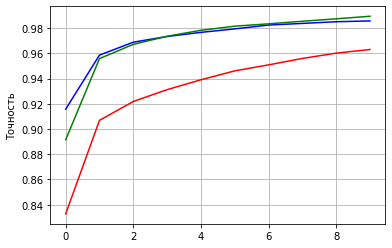

In [36]:
plt.plot(history_2.history['accuracy'], color = 'b')
plt.plot(history_5.history['accuracy'], color = 'r')
plt.plot(history_6.history['accuracy'], color = 'g')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

### Задание_3:
Что помогло вам улучшить её точность?

**Изменения в количестве и качестве слоёв, увеличение количества эпох, обучающих примеров, выбор оптимизатора**

### 
### Задание_4:

Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.

4.1. Из метода evaluate получены параметры для оценки ошибки и точности тестовых данных.

4.2. EarlyStopping позволяет закончить обучение если результаты больше не улучшаются.

4.3. predict_classes позволяет срузу получить метки классов

4.4. backend.tensorflow_backend._get_available_gpus позволяет увидеть доступные видеокарты